In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('/Users/pchaberski/projects/image-embeddings')

In [3]:
from utils.configuration import load_config
from data.hm_data import HMDataset
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
from data.hm_data_module import HMDataModule

In [4]:
cfg = load_config('config.yml')

---

Test data class

In [5]:
data_train_scaled = HMDataset(
    data_path=os.path.join(cfg.get('data_path'), 'train'),
    image_size=cfg.get('image_size'),
    center=False,
    center_params=cfg.get('center_params')
)

data_train_centered = HMDataset(
    data_path=os.path.join(cfg.get('data_path'), 'train'),
    image_size=cfg.get('image_size'),
    center=True,
    center_params=cfg.get('center_params')
)

In [6]:
idx = 666

tens_scaled = data_train_scaled[idx]
tens_centered = data_train_centered[idx]

print('Original, scaled 0-1:')
print(torch.min(tens_scaled), torch.max(tens_scaled))
print('Center:')
print(torch.min(tens_centered), torch.max(tens_centered))

Original, scaled 0-1:
tensor(0.1765) tensor(0.9373)
Center:
tensor(-2.9413) tensor(0.8531)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


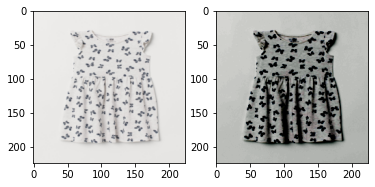

In [7]:
_, axarr = plt.subplots(1, 2)
axarr[0].imshow(tens_scaled.permute(1, 2, 0))
axarr[1].imshow(tens_centered.permute(1, 2, 0))

___

Test lightning data module

In [8]:
data_module = HMDataModule(
        data_path=cfg.get('data_path'),
        batch_size=cfg.get('batch_size'),
        image_size=cfg.get('image_size'),
        center=cfg.get('center'),
        center_params=cfg.get('center_params')
)

In [9]:
data_module.train_valid_ratio

0.9